In [ ]:
#run this to install dependencies
!pip install netrd
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 109.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 115.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of numpydoc to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/31

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 18.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=e1cc8c7cd0265c57dc9599c7166068c4f2161cfaac2b1ecab6fd54bba8f050b7
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [ ]:
#all necessary imports here
import torch_geometric.datasets
import torch_geometric.data
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import netrd
from scipy.sparse import csr_matrix, lil_matrix

In [ ]:
def plot_degree_dist(G, n = 'Custom'):
  degrees = [G.degree(n) for n in G.nodes()]

  degree_counts = nx.degree_histogram(G)

  plt.xlim(0, max(list(range(len(degree_counts)))))
  plt.bar(range(len(degree_counts)), degree_counts)
  plt.xlabel("Degree")
  plt.ylabel("Count")
  plt.title("Graph " + n)
  plt.xscale("symlog")
  plt.show()

def find_index(a, b, XY, start, end):  #XY-1D array
  l = [0,0]
  for i in range(start, end):
    if XY[i]==a:
      l[0] = i
    elif XY[i]==b:
      l[1] = i
  return l

def compare_find_common(a, b, XY, start, end):  #XY-2D array
  l = [0,0]
  for i in range(start,end):
    if np.array_equal(XY[i],a):
      l[0] = i
    elif np.array_equal(XY[i],b):
      l[1] = i
  return l

def convert(p):
  s = ""
  if p==0:
    print("Euclidean Distance")
    s = "Euclidean Distance"
  elif p==1:
    print("Cosine Similarity")
    s = "Cosine Similarity"
  elif p==2:
    print("Manhattan Distance")
    s = "Manhattan Distance"
  else:
    print("Hamming Distance")
    s = "Hamming Distance"
  return s

def dataset_select(data):
  if data[-1]=='1':
    print("Flickr Dataset selected!")
  elif data[-1]=='2':
    print("Amazon Computers Dataset selected!")
  elif data[-1]=='3':
    print("Attributed Graph Cora Dataset selected!")
  elif data[-1]=='4':
    print("Heterophilus Graph Questions dataset selected!")
  else:
    print("Citation CiteSeer dataset selected!")

In [ ]:
dataset1 = torch_geometric.datasets.Flickr("/content")
dataset2 = torch_geometric.datasets.Amazon("/content","Computers")
dataset3 = torch_geometric.datasets.AttributedGraphDataset("/content","Cora")
dataset4 = torch_geometric.datasets.HeterophilousGraphDataset("/content","Questions")
dataset5 = torch_geometric.datasets.CitationFull("/content","CiteSeer")

Processing...
Done!
Processing...
Done!
Extracting /content/cora/raw/uc
Processing...
Done!
Processing...
Done!
Processing...
Done!


In [ ]:
print("Select one of datasets:-")
y = int(input())
if y not in range(1,6):
  raise AssertionError("Invalid attribute")
if y==1:
  dataset = dataset1
  s = "dataset1"
elif y==2:
  dataset = dataset2
  s = "dataset2"
elif y==3:
  dataset = dataset3
  s = "dataset3"
elif y==4:
  dataset = dataset4
  s = "dataset4"
else:
  dataset = dataset5
  s = "dataset5"

dataset_select(s)

Select one of datasets:-
3
Attributed Graph Cora Dataset selected!


In [ ]:
graph_data = dataset[0]  #accessing the graph in the dataset
data = torch_geometric.data.Data(x=graph_data.x, edge_index=graph_data.edge_index, y=graph_data.y)
data

Data(x=[2708, 1433], edge_index=[2, 5429], y=[2708])

In [ ]:
set_data = data.__dict__ #converting data object to dictionary
dataset_report = pd.DataFrame(index = ["Number of Nodes", "Number of Node Features", "Number of Edges"])
dataset_report['0'] = [set_data['_store']['x'].shape[0], set_data['_store']['x'].shape[1], set_data['_store']['edge_index'].shape[1]]
dataset_report.to_csv("dataset_report_"+s+".csv") #saving dataset descriptive stats as csv file

In [ ]:
node_features = pd.DataFrame(data.x.numpy())
edge_indices = pd.DataFrame(data.edge_index.numpy().T, columns=['source', 'target']) #denotes the source and destination nodes starting from 0
node_labels = pd.DataFrame(data.y.numpy(), columns=['label']) #denotes the community to which an edge belongs
graph_df = pd.concat([node_features, edge_indices, node_labels], axis=1)
graph_df.dropna(inplace=True)
graph_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1426,1427,1428,1429,1430,1431,1432,source,target,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,163,402,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163,659,6.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163,1696,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163,2295,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163,1274,4.0


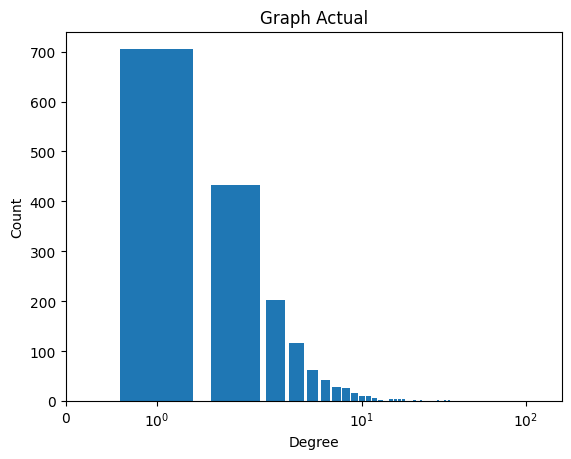

In [ ]:
data = graph_df[['source', 'target']]
data = data.to_numpy()
G_true = nx.Graph() #creating the actual(Ground truth) graph from the dataset
for i in range(data.shape[0]):
  G_true.add_edge(data[i][0], data[i][1])
plot_degree_dist(G_true, 'Actual') #using symmetrical log scale for x-axis (refer:- https://matplotlib.org/stable/api/scale_api.html#matplotlib.scale.SymmetricalLogScale)

In [ ]:
cols = graph_df.columns
cols = list(cols)
cols.remove('target')
cols.remove('label')

In [ ]:
feature_df = graph_df.loc[:,cols]
feature_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,source
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,163
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163


In [ ]:
X = feature_df.drop("source", axis=1)
cols.remove('source')
X = X.loc[:, cols]
X = X.to_numpy()

In [ ]:
#euclidean distance

batch_size = 10  # Define the batch size
num_points = X.shape[0]  # Total number of points
num_batches = num_points // batch_size  # Calculate the number of batches

XY = X.sum(1)
D = np.zeros((num_points, num_points), dtype=np.float16)
#D = np.full((num_points, num_points), np.inf)

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size

    batch_XY = XY[start_idx:end_idx]

    # Compute norms for the current batch
    for i in range(batch_XY.shape[0]):
        for j in range(batch_XY.shape[0]):
            if i==j:
                continue
            if batch_XY[i] == batch_XY[j]:
              idx1, idx2 = find_index(batch_XY[i], batch_XY[j], XY, start_idx, end_idx)
              D[idx1][idx2] = 1.0
              continue
            idx1, idx2 = find_index(batch_XY[i], batch_XY[j], XY, start_idx, end_idx)
            D[idx1][idx2] = np.linalg.norm(batch_XY[i] - batch_XY[j])

# Handle the remaining points if the total number of points is not divisible by the batch size
if num_points % batch_size != 0:
    start_idx = num_batches * batch_size
    end_idx = XY.shape[0]
    batch_XY = XY[start_idx:]

    # Compute norms for the remaining points
    for i in range(batch_XY.shape[0]):
        for j in range(batch_XY.shape[0]):
            if i==j:
                continue
            if batch_XY[i] == batch_XY[j]:
              idx1, idx2 = find_index(batch_XY[i], batch_XY[j], XY, start_idx, end_idx)
              D[idx1][idx2] = 1.0
              continue
            idx1, idx2 = find_index(batch_XY[i], batch_XY[j], XY, start_idx, end_idx)
            D[idx1][idx2] = np.linalg.norm(batch_XY[i] - batch_XY[j])

In [ ]:
D

array([[0., 3., 2., ..., 0., 0., 0.],
       [3., 0., 5., ..., 0., 0., 0.],
       [2., 5., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]], dtype=float16)

In [ ]:
th = 2.00  # threshold for determining similarity between nodes on the basis of Euclidean distance

batch_size = 1000  # Define the batch size
num_points = X.shape[0]  # Total number of points
num_batches = num_points // batch_size  # Calculate the number of batches

A = csr_matrix((num_points, num_points), dtype=bool)

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size

    batch_XY = D[start_idx:end_idx, :]

    # Compare for the current batch
    A[start_idx:end_idx, :] = csr_matrix(np.logical_and(batch_XY != 0, batch_XY < th))

# Handle the remaining points if the total number of points is not divisible by the batch size
if num_points % batch_size != 0:
    start_idx = num_batches * batch_size
    end_idx = XY.shape[0]
    batch_XY = D[start_idx:]

    # Compare for the remaining points
    A[start_idx:, :] = csr_matrix(np.logical_and(batch_XY != 0, batch_XY < th))

In [ ]:
A

<2708x2708 sparse matrix of type '<class 'numpy.bool_'>'
	with 2305 stored elements in Compressed Sparse Row format>

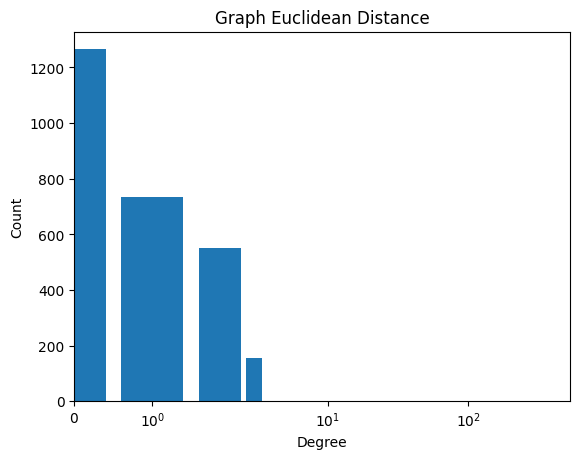

In [ ]:
G = nx.Graph(A.toarray())   #predicting graph for Euclidean Distance

plot_degree_dist(G, 'Euclidean Distance') #using symmetrical log scale for x-axis (refer:- https://matplotlib.org/stable/api/scale_api.html#matplotlib.scale.SymmetricalLogScale)

In [ ]:
#cosine similarity

Cos = np.zeros((X.shape[0], X.shape[0]))
#Cos = np.full((num_points, num_points), np.inf)

batch_size = 10  # Define the batch size
num_points = X.shape[0]  # Total number of points
num_batches = num_points // batch_size  # Calculate the number of batches

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size

    batch_XY = X[start_idx:end_idx, :]

    # Compute cosine similarities for the current batch
    for i in range(batch_XY.shape[0]):
        for j in range(batch_XY.shape[0]):
            if i==j:
                continue
            idx1, idx2 = compare_find_common(batch_XY[i,:], batch_XY[j,:], X, start_idx, end_idx)
            Cos[idx1][idx2] = scipy.spatial.distance.cosine(batch_XY[i, :], batch_XY[j, :])*(-1) + 1
            if Cos[idx1][idx2]==0:
              Cos[idx1][idx2]=0.13

# Handle the remaining points if the total number of points is not divisible by the batch size
if num_points % batch_size != 0:
    start_idx = num_batches * batch_size
    end_idx = XY.shape[0]
    batch_XY = X[start_idx:]

    # Compute cosine similarities for the remaining points
    for i in range(batch_XY.shape[0]):
        for j in range(batch_XY.shape[0]):
            if i==j:
                continue
            idx1, idx2 = compare_find_common(batch_XY[i,:], batch_XY[j,:], X, start_idx, end_idx)
            Cos[idx1][idx2] = scipy.spatial.distance.cosine(batch_XY[i, :], batch_XY[j, :])*(-1) + 1
            if Cos[idx1][idx2]==0:
              Cos[idx1][idx2]=0.13

In [ ]:
Cos

array([[0.       , 0.13     , 0.13     , ..., 0.       , 0.       ,
        0.       ],
       [0.13     , 0.       , 0.1551263, ..., 0.       , 0.       ,
        0.       ],
       [0.13     , 0.1551263, 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.13     ,
        0.13     ],
       [0.       , 0.       , 0.       , ..., 0.13     , 0.       ,
        0.13     ],
       [0.       , 0.       , 0.       , ..., 0.13     , 0.13     ,
        0.       ]])

In [ ]:
#compute predicted graph using Cosine Similarity
th1 = 0.051  #threshold for determining similarity between nodes on basis of Cosine Similarity

batch_size = 1000  # Define the batch size
num_points = X.shape[0]  # Total number of points
num_batches = num_points // batch_size  # Calculate the number of batches

A1 = csr_matrix((num_points, num_points), dtype=bool)

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size

    batch_XY = Cos[start_idx:end_idx, :]

    # Compare for the current batch
    A1[start_idx:end_idx, :] = csr_matrix(np.logical_and(batch_XY != 0, batch_XY < th1))

# Handle the remaining points if the total number of points is not divisible by the batch size
if num_points % batch_size != 0:
    start_idx = num_batches * batch_size
    end_idx = XY.shape[0]
    batch_XY = Cos[start_idx:]

    # Compare for the remaining points
    A1[start_idx:, :] = csr_matrix(np.logical_and(batch_XY != 0, batch_XY < th1))

In [ ]:
A1

<2708x2708 sparse matrix of type '<class 'numpy.bool_'>'
	with 3506 stored elements in Compressed Sparse Row format>

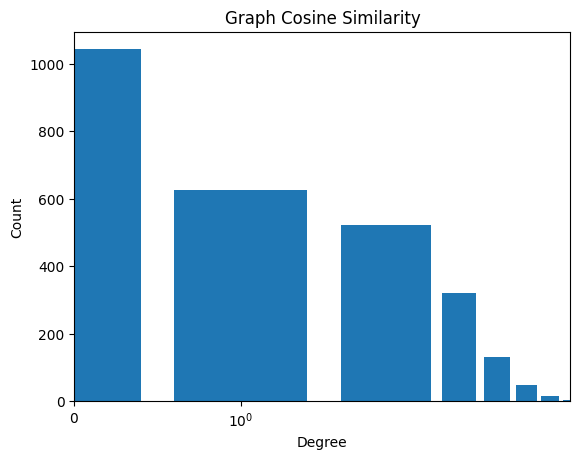

In [ ]:
G1 = nx.Graph(A1.toarray())   #predicting graph for Cosine Similarity

plot_degree_dist(G1, 'Cosine Similarity') #using symmetrical log scale for x-axis (refer:- https://matplotlib.org/stable/api/scale_api.html#matplotlib.scale.SymmetricalLogScale)

In [ ]:
#manhattan distance

Man = np.zeros((X.shape[0], X.shape[0]))
#Man = np.full((X.shape[0], X.shape[0]), np.inf)

batch_size = 10  # Define the batch size
num_points = X.shape[0]  # Total number of points
num_batches = num_points // batch_size  # Calculate the number of batches

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size

    batch_XY = X[start_idx:end_idx, :]

    # Compute manhattan distances for the current batch
    for i in range(batch_XY.shape[0]):
        for j in range(batch_XY.shape[0]):
            if i==j:
                continue
            idx1, idx2 = compare_find_common(batch_XY[i,:], batch_XY[j,:], X, start_idx, end_idx)
            Man[idx1][idx2] = sum(np.abs(batch_XY[i, :] - batch_XY[j, :]))
            if Man[idx1][idx2]==0:
              Man[idx1][idx2]=44

# Handle the remaining points if the total number of points is not divisible by the batch size
if num_points % batch_size != 0:
    start_idx = num_batches * batch_size
    end_idx = XY.shape[0]
    batch_XY = X[start_idx:]

    # Compute manhattan distances for the remaining points
    for i in range(batch_XY.shape[0]):
        for j in range(batch_XY.shape[0]):
            if i==j:
                continue
            idx1, idx2 = compare_find_common(batch_XY[i,:], batch_XY[j,:], X, start_idx, end_idx)
            Man[idx1][idx2] = sum(np.abs(batch_XY[i, :] - batch_XY[j, :]))
            if Man[idx1][idx2]==0:
              Man[idx1][idx2]=44

In [ ]:
Man

array([[ 0., 37., 42., ...,  0.,  0.,  0.],
       [37.,  0., 33., ...,  0.,  0.,  0.],
       [42., 33.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., 37., 37.],
       [ 0.,  0.,  0., ..., 37.,  0., 38.],
       [ 0.,  0.,  0., ..., 37., 38.,  0.]])

In [ ]:
#compute predicted graph using Manhattan Distance
th2 = 24.6  #threshold for determining similarity between nodes on basis of Manhattan Distance

batch_size = 1000  # Define the batch size
num_points = X.shape[0]  # Total number of points
num_batches = num_points // batch_size  # Calculate the number of batches

A2 = csr_matrix((num_points, num_points), dtype=bool)

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size

    batch_XY = Man[start_idx:end_idx, :]

    # Compare for the current batch
    A2[start_idx:end_idx, :] = csr_matrix(np.logical_and(batch_XY != 0, batch_XY < th2))

# Handle the remaining points if the total number of points is not divisible by the batch size
if num_points % batch_size != 0:
    start_idx = num_batches * batch_size
    end_idx = XY.shape[0]
    batch_XY = Man[start_idx:]

    # Compare for the remaining points
    A2[start_idx:, :] = csr_matrix(np.logical_and(batch_XY != 0, batch_XY < th2))

In [ ]:
A2

<2708x2708 sparse matrix of type '<class 'numpy.bool_'>'
	with 3218 stored elements in Compressed Sparse Row format>

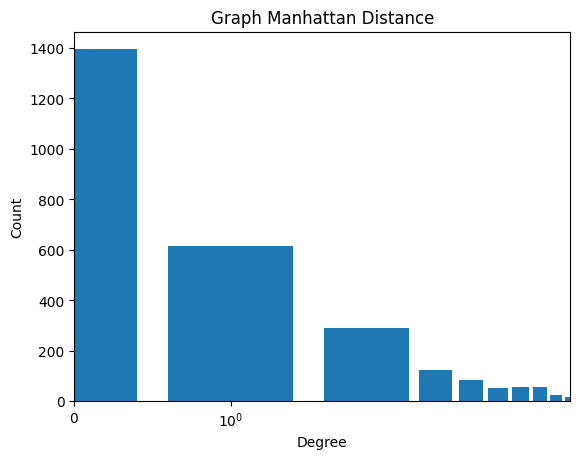

In [ ]:
G2 = nx.Graph(A2.toarray())  #predicting graph for Manhattan Distance

plot_degree_dist(G2, 'Manhattan Distance') #using symmetrical log scale for x-axis (refer:- https://matplotlib.org/stable/api/scale_api.html#matplotlib.scale.SymmetricalLogScale)

In [ ]:
#hamming distance can also refer netrd documentation: https://netrd.readthedocs.io/en/latest/distance.html#netrd.distance.Hamming

thd = 0.6375
batch_size = 10  # Define the batch size
num_points = X.shape[0]  # Total number of points
num_batches = num_points // batch_size  # Calculate the number of batches

for batch_idx in range(num_batches):   #set binary strings for features of nodes
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size

    batch_XY = X[start_idx:end_idx, :]
    X[start_idx:end_idx] = np.where(batch_XY < thd, 1, 0)

# Handle the remaining points if the total number of points is not divisible by the batch size
if num_points % batch_size != 0:
    start_idx = num_batches * batch_size
    end_idx = XY.shape[0]
    batch_XY = X[start_idx:]
    X[start_idx:] = np.where(batch_XY < thd, 1, 0)

In [ ]:
#compute hamming distance

Ham = np.zeros((X.shape[0], X.shape[0]))
#Ham = np.full((X.shape[0], X.shape[0]), np.inf)

batch_size = 10  # Define the batch size
num_points = X.shape[0]  # Total number of points
num_batches = num_points // batch_size  # Calculate the number of batches

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size

    batch_XY = X[start_idx:end_idx, :]

    # Compute hamming distance for the current batch
    for i in range(batch_XY.shape[0]):
        for j in range(batch_XY.shape[0]):
            if i == j:
                continue
            idx1, idx2 = compare_find_common(batch_XY[i, :], batch_XY[j, :], Ham, start_idx, end_idx)
            Ham[idx1][idx2] = np.logical_xor(batch_XY[i, :], batch_XY[j, :]).sum()
            if Ham[idx1][idx2]==0:
              Ham[idx1][idx2]=35

# Handle the remaining points if the total number of points is not divisible by the batch size
if num_points % batch_size != 0:
    start_idx = num_batches * batch_size
    end_idx = XY.shape[0]
    batch_XY = X[start_idx:]

    # Compute hamming distance for the remaining points
    for i in range(batch_XY.shape[0]):
        for j in range(batch_XY.shape[0]):
            if i == j:
                continue
            idx1, idx2 = compare_find_common(batch_XY[i, :], batch_XY[j, :], Ham, start_idx, end_idx)
            Ham[idx1][idx2] = np.logical_xor(batch_XY[i, :], batch_XY[j, :]).sum()
            if Ham[idx1][idx2]==0:
              Ham[idx1][idx2]=35

In [ ]:
Ham

array([[38.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
#compute predicted graph using Hamming Distance
th3 = 39  #threshold for determining similarity between nodes on basis of Hamming Distance

batch_size = 1000  # Define the batch size
num_points = X.shape[0]  # Total number of points
num_batches = num_points // batch_size  # Calculate the number of batches

A3 = csr_matrix((num_points, num_points), dtype=bool)

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size

    batch_XY = Ham[start_idx:end_idx, :]

    # Compare for the current batch
    A3[start_idx:end_idx, :] = csr_matrix(np.logical_and(batch_XY != 0, batch_XY < th3))

# Handle the remaining points if the total number of points is not divisible by the batch size
if num_points % batch_size != 0:
    start_idx = num_batches * batch_size
    end_idx = XY.shape[0]
    batch_XY = Ham[start_idx:]

    # Compare for the remaining points
    A3[start_idx:end_idx, :] = csr_matrix(np.logical_and(batch_XY != 0, batch_XY < th3))

In [ ]:
A3

<2708x2708 sparse matrix of type '<class 'numpy.bool_'>'
	with 1 stored elements in Compressed Sparse Row format>

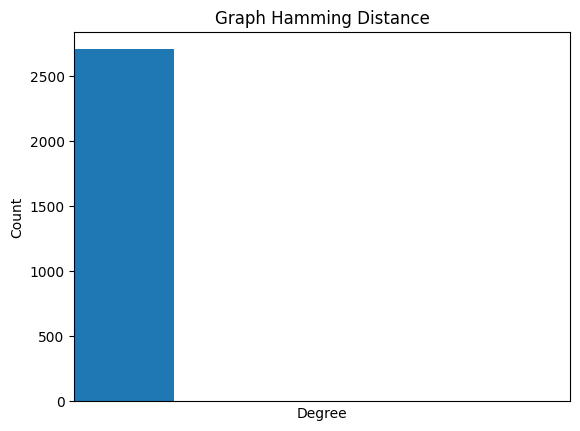

In [ ]:
G3 = nx.Graph(A3.toarray())  #predicting graph for Hamming Distance

plot_degree_dist(G3, 'Hamming Distance') #using symmetrical log scale for x-axis (refer:- https://matplotlib.org/stable/api/scale_api.html#matplotlib.scale.SymmetricalLogScale)

In [ ]:
G_true  #actual(Ground truth value) graph estimated from the dataset

In [ ]:
#For Jaccard distance refer: https://netrd.readthedocs.io/en/latest/distance.html#netrd.distance.JaccardDistance

obj = netrd.distance.JaccardDistance()
#corresponding jaccard distance comparsions between predicted and ground truth
y = obj.dist(G, G_true) #euclidean distance
y_1 = obj.dist(G1, G_true) #cosine similarity
y_2 = obj.dist(G2, G_true) #manhattan distance
y_3 = obj.dist(G3, G_true) #hamming distance

print("***Jaccard Similarity Summary***")
print("1) Ground truth vs estimated (Euclidean):- ",y)
print("2) Ground truth vs estimated (Cosine):- ",y_1)
print("3) Ground truth vs estimated (Manhattan):- ",y_2)
print("4) Ground truth vs estimated (Hamming):- ",y_3)

l_jacc = [y, y_1, y_2, y_3]

***Jaccard Similarity Summary***
1) Ground truth vs estimated (Euclidean):-  0.9992686494392979
2) Ground truth vs estimated (Cosine):-  0.9995491433724075
3) Ground truth vs estimated (Manhattan):-  0.9978996499416569
4) Ground truth vs estimated (Hamming):-  1.0


In [ ]:
#jensen shannon divergence
#*******given below******* link:- https://netrd.readthedocs.io/en/latest/distance.html

#compute js divergence between predicted and groud truth
obj1 = netrd.distance.DegreeDivergence()
jsdy = obj1.dist(G, G_true) #euclidean distance
jsdy_1 = obj1.dist(G1, G_true) #cosine similarity
jsdy_2 = obj1.dist(G2, G_true) #manhattan distance
jsdy_3 = obj1.dist(G3, G_true) #hamming distance

print("***Jensen Shannon Similarity Summary***")
print("1) Ground truth vs estimated (Euclidean):- ",jsdy)
print("2) Ground truth vs estimated (Cosine):- ",jsdy_1)
print("3) Ground truth vs estimated (Manhattan):- ",jsdy_2)
print("4) Ground truth vs estimated (Hamming):- ",jsdy_3)

l_js = [jsdy, jsdy_1, jsdy_2, jsdy_3]

***Jensen Shannon Similarity Summary***
1) Ground truth vs estimated (Euclidean):-  0.3752480347752202
2) Ground truth vs estimated (Cosine):-  0.2727290753873529
3) Ground truth vs estimated (Manhattan):-  0.3542624984093862
4) Ground truth vs estimated (Hamming):-  1.0362203176518079


In [ ]:
#graph node signature distribution similarity
#reference: https://netrd.readthedocs.io/en/latest/distance.html#netrd.distance.NetSimile

obj2 = netrd.distance.NetSimile()
nsy = obj2.dist(G, G_true) #euclidean distance
nsy_1 = obj2.dist(G1, G_true) #cosine similarity
nsy_2 = obj2.dist(G2, G_true) #manhattan distance
nsy_3 = obj2.dist(G3, G_true) #hamming distance

print("***Graph Node Signature Distribution Similarity Summary***")
print("1) Ground truth vs estimated (Euclidean):- ",nsy)
print("2) Ground truth vs estimated (Cosine):- ",nsy_1)
print("3) Ground truth vs estimated (Manhattan):- ",nsy_2)
print("4) Ground truth vs estimated (Hamming):- ",nsy_3)

l_ns = [nsy, nsy_1, nsy_2, nsy_3]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


***Graph Node Signature Distribution Similarity Summary***
1) Ground truth vs estimated (Euclidean):-  16.861287799179884
2) Ground truth vs estimated (Cosine):-  20.453144975788817
3) Ground truth vs estimated (Manhattan):-  21.125044046161538
4) Ground truth vs estimated (Hamming):-  22.85067335265898


In [ ]:
#Onion distance between graphs based on their adjacency matrices
#reference: https://netrd.readthedocs.io/en/latest/distance.html#netrd.distance.OnionDivergence

obj3 = netrd.distance.OnionDivergence()
froby = obj3.dist(G, G_true) #euclidean distance
froby_1 = obj3.dist(G1, G_true) #cosine similarity
froby_2 = obj3.dist(G2, G_true) #manhattan distance
froby_3 = obj3.dist(G3, G_true) #hamming distance

print("***Onion Distance Similarity Summary***")
print("1) Ground truth vs estimated (Euclidean):- ",froby)
print("2) Ground truth vs estimated (Cosine):- ",froby_1)
print("3) Ground truth vs estimated (Manhattan):- ",froby_2)
print("4) Ground truth vs estimated (Hamming):- ",froby_3)

l_frob = [froby, froby_1, froby_2, froby_3]

***Onion Distance Similarity Summary***
1) Ground truth vs estimated (Euclidean):-  0.8753376025958205
2) Ground truth vs estimated (Cosine):-  0.6700699305523061
3) Ground truth vs estimated (Manhattan):-  0.6364708898069464
4) Ground truth vs estimated (Hamming):-  0.5000000000000028


In [ ]:
m1 = max(l_jacc)
m2 = min(l_js)
m3 = min(l_ns)
m4 = min(l_frob)
l1 = find_index(m1, None, l_jacc, 0, 4)
l2 = find_index(m2, None, l_js, 0, 4)
l3 = find_index(m3, None, l_ns, 0, 4)
l4 = find_index(m4, None, l_frob, 0, 4)
i = convert(l1[0])  #closer graph metric as per Jaccard similarity
j = convert(l2[0])  #closer graph metric as per JS divergence similarity
k = convert(l3[0])  #closer graph metric as per Node Signature similarity
l = convert(l4[0])  #closer graph metric as per Onion Degree Divergence similarity

Hamming Distance
Cosine Similarity
Euclidean Distance
Hamming Distance


In [ ]:
'''
TODO1 : Till the work done above, summarise all your readings and observations for
each dataset in the form of a table. Justify them using values obtained
(5 tables for 5 datasets)

TODO2: For each dataset, generate its descriptive statistics (number of nodes,
number of node features, etc) (5 tables for 5 datasets)
'''

'\nTODO1 : Till the work done above, summarise all your readings and observations for\neach dataset in the form of a table. Justify them using values obtained\n(5 tables for 5 datasets)\n\nTODO2: For each dataset, generate its descriptive statistics (number of nodes,\nnumber of node features, etc) (5 tables for 5 datasets)\n'

In [ ]:
report = pd.DataFrame(index = ['Euclidean Distance', 'Cosine Similarity', 'Manhattan Distance', 'Hamming Distance'])
report['Jaccard Distance'] = l_jacc
report['JS Divergence'] = l_js
report['Netsimile Divergence'] = l_ns
report['Onion Divergence'] = l_frob
report['Threshold Value'] = [th, th1, th2, th3]
report['Hamming Threshold'] = [0, 0, 0, thd]

final_results = pd.DataFrame(index = ['Euclidean Distance', 'Cosine Similarity', 'Manhattan Distance', 'Hamming Distance'])
final_results['Jaccard Distance'] = ['Not Close: {}'.format(l_jacc[0]), 'Not Close: {}'.format(l_jacc[1]), 'Not Close: {}'.format(l_jacc[2]), 'Not Close: {}'.format(l_jacc[3])]
final_results['JS Divergence'] = ['Not Close: {}'.format(l_js[0]), 'Not Close: {}'.format(l_js[1]), 'Not Close: {}'.format(l_js[2]), 'Not Close: {}'.format(l_js[3])]
final_results['Netsimile Divergence'] = ['Not Close: {}'.format(l_ns[0]), 'Not Close: {}'.format(l_ns[1]), 'Not Close: {}'.format(l_ns[2]), 'Not Close: {}'.format(l_ns[3])]
final_results['Onion Divergence'] = ['Not Close: {}'.format(l_frob[0]), 'Not Close: {}'.format(l_frob[1]), 'Not Close: {}'.format(l_frob[2]), 'Not Close: {}'.format(l_frob[3])]
final_results['Jaccard Distance'][i] = 'Close: {}'.format(m1)
final_results['JS Divergence'][j] = 'Close: {}'.format(m2)
final_results['Netsimile Divergence'][k] = 'Close: {}'.format(m3)
final_results['Onion Divergence'][l] = 'Close: {}'.format(m4)


In [ ]:
report #printing report

,Jaccard Distance,JS Divergence,Netsimile Divergence,Onion Divergence,Threshold Value,Hamming Threshold
Euclidean Distance,0.999269,0.375248,16.861288,0.875338,2.000,0.0000
Cosine Similarity,0.999549,0.272729,20.453145,0.670070,0.051,0.0000
Manhattan Distance,0.997900,0.354262,21.125044,0.636471,24.600,0.0000
Hamming Distance,1.000000,1.036220,22.850673,0.500000,39.000,0.6375


In [ ]:
final_results #printing final observations

,Jaccard Distance,JS Divergence,Netsimile Divergence,Onion Divergence
Euclidean Distance,Not Close: 0.9992686494392979,Not Close: 0.3752480347752202,Close: 16.861287799179884,Not Close: 0.8753376025958205
Cosine Similarity,Not Close: 0.9995491433724075,Close: 0.2727290753873529,Not Close: 20.453144975788817,Not Close: 0.6700699305523061
Manhattan Distance,Not Close: 0.9978996499416569,Not Close: 0.3542624984093862,Not Close: 21.125044046161538,Not Close: 0.6364708898069464
Hamming Distance,Close: 1.0,Not Close: 1.0362203176518079,Not Close: 22.85067335265898,Close: 0.5000000000000028


In [ ]:
#creating csv files
report.to_csv("report_"+s+".csv")
final_results.to_csv("final_results_"+s+".csv")

In [ ]:
#zipping together csv files
import zipfile as zp

with zp.ZipFile("table_"+s+".zip",'w') as zipf:
  zipf.write("report_"+s+".csv")
  zipf.write("final_results_"+s+".csv")
  zipf.write("dataset_report_"+s+".csv")